# Exploratory Analysis - Jordan
## Stats 131 Project 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
movies = pd.read_csv("movie_metadata.csv")

In [8]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
movies.shape

(5043, 28)

In [11]:
#keeping only title, genre, and budget columns 
genres_budget = movies[['title_year', 'movie_title', 'genres', 'budget']]
genres_budget = genres_budget.dropna(axis = 0) #remove missing values
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [12]:
genres_budget.shape

(4543, 4)

In [13]:
genres_budget['budget'].min()

218.0

In [14]:
genres_budget['budget'].max()

12215500000.0

In [15]:
#only looking from after 1986
genres_budget = genres_budget.loc[genres_budget['title_year'] > 1986.0]
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [16]:
genres_budget.shape

(4110, 4)

In [17]:
genres_budget.title_year.unique()

array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003., 2001.,
       2002., 1998., 2000., 1990., 1991., 1994., 1996., 1993., 1992.,
       1989., 1988., 1987.])

In [18]:
#splitting genres string into a list
genres_budget['genres_breakdown'] = [item.split("|") for item in genres_budget.genres]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]"
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]"
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]"
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]"
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]"


In [19]:
#number of genre categories each movie is in
genres_budget['genres_amt'] = [len(item) for item in genres_budget.genres_breakdown]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown,genres_amt
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]",4
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]",3
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]",3
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]",2
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]",3


In [20]:
#dividing movie budget among each of its genre categories
genres_budget['split_budget'] = genres_budget.budget / genres_budget.genres_amt
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown,genres_amt,split_budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]",4,5.925000e+07
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]",3,1.000000e+08
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]",3,8.166667e+07
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]",2,1.250000e+08
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]",3,8.790000e+07


In [21]:
s = genres_budget.apply(lambda x: pd.Series(x['genres_breakdown']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genres_breakdown'
yearly_breakdown = genres_budget.drop('genres_breakdown', axis = 1).join(s)
yearly_breakdown['genres_breakdown'] = pd.Series(yearly_breakdown['genres_breakdown'], dtype = object)
yearly_breakdown.head()

,title_year,movie_title,genres,budget,genres_amt,split_budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,3,100000000.0,Action


In [22]:
yearly_budgets = yearly_breakdown.groupby(['title_year', 'genres_breakdown'])['split_budget'].sum()
yearly_budgets = yearly_budgets.unstack('genres_breakdown')
yearly_budgets = yearly_budgets.fillna(0.0) 
#turning budgets into ratios by year 
yearly_budgets['total'] = yearly_budgets.sum(axis = 1)
yearly_budgets

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,total
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,4.810833e+07,4.606667e+07,3.833333e+05,2.275000e+07,5.144167e+07,2.990833e+07,0.000000e+00,5.232500e+07,1.230000e+07,1.128333e+07,...,0.000000e+00,0.0,9.966667e+06,2.356667e+07,0.0,0.000000e+00,6.145000e+07,3.250000e+06,0.000000e+00,4.195500e+08
1988.0,4.144083e+08,2.618333e+07,3.708333e+08,2.750000e+05,5.461667e+07,2.035000e+07,0.000000e+00,9.730833e+07,7.766667e+06,3.037500e+07,...,1.175000e+06,0.0,2.626667e+07,3.752667e+08,0.0,2.750000e+05,5.479167e+07,1.575000e+07,2.600000e+06,1.520900e+09
1989.0,9.052500e+07,9.582500e+07,0.000000e+00,6.166667e+06,7.819167e+07,3.850000e+07,1.600000e+05,7.152500e+07,2.500000e+06,2.550000e+07,...,4.750000e+06,0.0,1.383333e+07,4.406667e+07,0.0,8.833333e+06,7.724167e+07,1.816667e+07,0.000000e+00,6.058600e+08
1990.0,1.776667e+08,6.900000e+07,0.000000e+00,8.333333e+06,8.716513e+07,6.733333e+07,0.000000e+00,8.207500e+07,3.900680e+07,4.641667e+07,...,6.666667e+06,0.0,4.658180e+07,9.783333e+07,6800.0,2.000000e+07,8.141667e+07,0.000000e+00,2.133333e+07,9.392590e+08
1991.0,1.274333e+08,8.150000e+07,0.000000e+00,9.500000e+06,9.801150e+07,5.532500e+07,0.000000e+00,1.019615e+08,2.662500e+07,5.212500e+07,...,0.000000e+00,0.0,3.620833e+07,6.900000e+07,0.0,0.000000e+00,6.480833e+07,8.750000e+06,4.600000e+06,7.804730e+08
1992.0,1.484847e+08,3.133333e+07,4.000000e+06,1.991667e+07,8.973333e+07,4.387640e+07,0.000000e+00,1.529097e+08,1.490000e+07,4.240000e+07,...,4.166667e+06,0.0,7.707640e+07,3.506667e+07,0.0,1.583333e+07,7.254307e+07,8.000000e+06,7.200000e+06,8.574070e+08
1993.0,8.385000e+07,1.002417e+08,5.600000e+06,2.683333e+07,9.089167e+07,5.483333e+07,0.000000e+00,1.878167e+08,3.852500e+07,7.386667e+07,...,3.258333e+07,0.0,6.753333e+07,5.544167e+07,0.0,4.616667e+06,1.067667e+08,8.333333e+06,4.166667e+06,9.743000e+08
1994.0,1.739500e+08,8.968333e+07,9.000000e+06,1.960000e+07,2.860800e+08,1.582833e+08,2.333333e+05,2.588667e+08,7.116667e+07,8.033333e+07,...,2.508333e+07,0.0,6.100000e+07,2.025000e+07,0.0,2.333333e+05,2.038667e+08,7.500000e+06,2.010000e+07,1.537730e+09
1995.0,3.468333e+08,2.524571e+08,1.385714e+07,6.950000e+07,1.828083e+08,1.411333e+08,0.000000e+00,3.526155e+08,5.552381e+07,8.645000e+07,...,3.325000e+07,0.0,1.239988e+08,8.443333e+07,0.0,0.000000e+00,3.072500e+08,3.425000e+07,1.066667e+07,2.195925e+09


In [23]:
#turning budgets into ratios (by year) 
budget_ratio = yearly_budgets.loc[:, 'Action':'Western'].div(yearly_budgets['total'], axis = 0)
budget_ratio

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,0.114667,0.109800,0.000914,0.054225,0.122612,0.071287,0.000000,0.124717,0.029317,0.026894,...,0.000914,0.000000,0.000000,0.023756,0.056171,0.000000,0.000000,0.146466,0.007746,0.000000
1988.0,0.272476,0.017216,0.243825,0.000181,0.035911,0.013380,0.000000,0.063981,0.005107,0.019972,...,0.001425,0.000773,0.000000,0.017270,0.246740,0.000000,0.000181,0.036026,0.010356,0.001710
1989.0,0.149416,0.158164,0.000000,0.010178,0.129059,0.063546,0.000264,0.118055,0.004126,0.042089,...,0.000000,0.007840,0.000000,0.022833,0.072734,0.000000,0.014580,0.127491,0.029985,0.000000
1990.0,0.189156,0.073462,0.000000,0.008872,0.092802,0.071688,0.000000,0.087383,0.041529,0.049418,...,0.000007,0.007098,0.000000,0.049594,0.104160,0.000007,0.021293,0.086682,0.000000,0.022713
1991.0,0.163277,0.104424,0.000000,0.012172,0.125580,0.070887,0.000000,0.130641,0.034114,0.066786,...,0.012172,0.000000,0.000000,0.046393,0.088408,0.000000,0.000000,0.083037,0.011211,0.005894
1992.0,0.173179,0.036544,0.004665,0.023229,0.104657,0.051173,0.000000,0.178340,0.017378,0.049451,...,0.007464,0.004860,0.000000,0.089895,0.040899,0.000000,0.018467,0.084608,0.009330,0.008397
1993.0,0.086062,0.102886,0.005748,0.027541,0.093289,0.056280,0.000000,0.192771,0.039541,0.075815,...,0.000000,0.033443,0.000000,0.069315,0.056904,0.000000,0.004738,0.109583,0.008553,0.004277
1994.0,0.113121,0.058322,0.005853,0.012746,0.186040,0.102933,0.000152,0.168343,0.046280,0.052242,...,0.005853,0.016312,0.000000,0.039669,0.013169,0.000000,0.000152,0.132576,0.004877,0.013071
1995.0,0.157944,0.114966,0.006310,0.031650,0.083249,0.064271,0.000000,0.160577,0.025285,0.039368,...,0.003578,0.015142,0.000000,0.056468,0.038450,0.000000,0.000000,0.139918,0.015597,0.004857


In [24]:
#checking ratios (should all be 1) 
budget_ratio.sum(axis = 1)

title_year
1987.0    1.0
1988.0    1.0
1989.0    1.0
1990.0    1.0
1991.0    1.0
1992.0    1.0
1993.0    1.0
1994.0    1.0
1995.0    1.0
1996.0    1.0
1997.0    1.0
1998.0    1.0
1999.0    1.0
2000.0    1.0
2001.0    1.0
2002.0    1.0
2003.0    1.0
2004.0    1.0
2005.0    1.0
2006.0    1.0
2007.0    1.0
2008.0    1.0
2009.0    1.0
2010.0    1.0
2011.0    1.0
2012.0    1.0
2013.0    1.0
2014.0    1.0
2015.0    1.0
2016.0    1.0
dtype: float64

In [25]:
budget_ratio.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genres_breakdown')

In [26]:
budget_ratio.max()

genres_breakdown
Action         0.272476
Adventure      0.195659
Animation      0.243825
Biography      0.054225
Comedy         0.195653
Crime          0.178593
Documentary    0.023370
Drama          0.278766
Family         0.078801
Fantasy        0.136331
History        0.041314
Horror         0.159438
Music          0.029476
Musical        0.077305
Mystery        0.043901
News           0.000056
Romance        0.104831
Sci-Fi         0.246740
Short          0.000238
Sport          0.022082
Thriller       0.149108
War            0.065715
Western        0.022713
dtype: float64

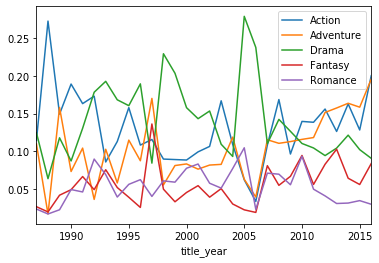

In [27]:
#results['BMXLEG'].plot(label = "leg length")
budget_ratio['Action'].plot(label = "Action")
budget_ratio['Adventure'].plot(label = "Adventure")
budget_ratio['Drama'].plot(label = "Drama")
budget_ratio['Fantasy'].plot(label = "Fantasy")
budget_ratio['Romance'].plot(label = "Romance")
plt.legend()

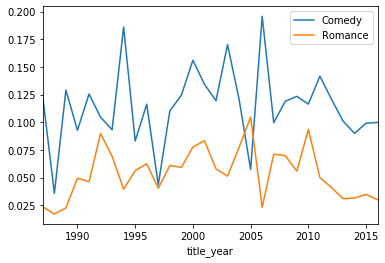

In [28]:
budget_ratio['Comedy'].plot()
budget_ratio['Romance'].plot()
plt.legend()

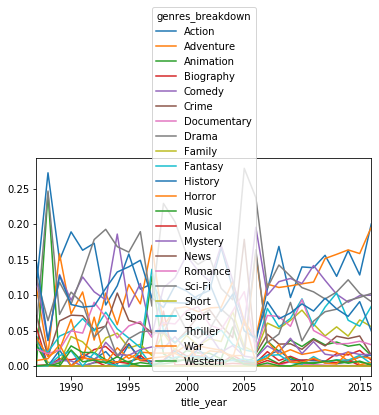

In [29]:
budget_ratio.plot()

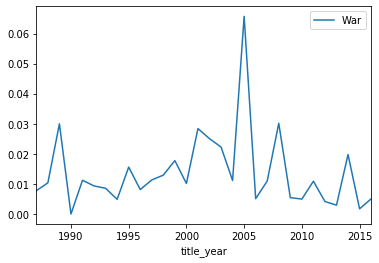

In [30]:
budget_ratio['War'].plot()
plt.legend()

# Not splitting budget among individual movie genres

In [31]:
budget_full = yearly_breakdown.groupby(['title_year', 'genres_breakdown'])['budget'].sum()
budget_full = budget_full.unstack('genres_breakdown')
budget_full = budget_full.fillna(0.0) 
budget_full['total'] = budget_full.sum(axis = 1)
budget_full

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,total
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,1.839500e+08,1.660000e+08,2.300000e+06,71500000.0,1.542000e+08,9.630000e+07,0.0,1.518500e+08,4.630000e+07,3.790000e+07,...,0.000000e+00,0.0,3.260000e+07,8.170000e+07,0.0,0.0,2.220000e+08,1.300000e+07,0.0,1.424400e+09
1988.0,1.260900e+09,9.430000e+07,1.112500e+09,1100000.0,1.653000e+08,6.800000e+07,0.0,1.686000e+08,3.050000e+07,8.870000e+07,...,4.700000e+06,0.0,7.200000e+07,1.127000e+09,0.0,1100000.0,1.752000e+08,6.300000e+07,13000000.0,4.498400e+09
1989.0,2.731000e+08,2.853000e+08,0.000000e+00,23000000.0,2.162000e+08,1.240000e+08,160000.0,2.151000e+08,7.500000e+06,7.450000e+07,...,1.900000e+07,0.0,4.800000e+07,1.596000e+08,0.0,21000000.0,2.683000e+08,5.900000e+07,0.0,1.885560e+09
1990.0,5.110000e+08,2.150000e+08,0.000000e+00,25000000.0,3.332590e+08,2.450000e+08,0.0,2.392250e+08,7.803400e+07,1.360000e+08,...,4.000000e+07,0.0,1.862590e+08,2.450000e+08,34000.0,60000000.0,2.790000e+08,0.000000e+00,82000000.0,2.999845e+09
1991.0,3.790000e+08,2.940000e+08,0.000000e+00,38000000.0,3.085230e+08,1.464500e+08,0.0,3.294730e+08,1.115000e+08,1.665000e+08,...,0.000000e+00,0.0,1.110000e+08,1.830000e+08,0.0,0.0,2.155000e+08,3.500000e+07,23000000.0,2.509946e+09
1992.0,2.900070e+08,1.260000e+08,2.800000e+07,68000000.0,2.870000e+08,1.290070e+08,0.0,3.974070e+08,6.800000e+07,1.480000e+08,...,1.250000e+07,0.0,2.883070e+08,1.150000e+08,0.0,50000000.0,1.905070e+08,4.000000e+07,14400000.0,2.545135e+09
1993.0,3.342000e+08,3.901000e+08,2.800000e+07,101000000.0,3.236000e+08,2.002000e+08,0.0,5.042000e+08,1.525000e+08,2.741000e+08,...,1.310000e+08,0.0,1.989000e+08,1.975000e+08,0.0,17600000.0,3.765000e+08,2.500000e+07,25000000.0,3.386700e+09
1994.0,6.466000e+08,3.930000e+08,4.500000e+07,86000000.0,7.144300e+08,5.772000e+08,700000.0,8.213000e+08,2.370000e+08,2.570000e+08,...,1.150000e+08,0.0,2.425000e+08,8.800000e+07,0.0,700000.0,7.236000e+08,3.000000e+07,93000000.0,5.274030e+09
1995.0,1.163500e+09,8.490000e+08,8.500000e+07,216000000.0,5.733250e+08,4.852500e+08,0.0,1.023175e+09,2.100000e+08,2.880000e+08,...,1.390000e+08,0.0,3.628750e+08,3.330000e+08,0.0,0.0,1.053250e+09,1.310000e+08,32000000.0,7.345875e+09


In [32]:
budget_full_ratio = budget_full.loc[:, 'Action':'Western'].div(budget_full['total'], axis = 0)
budget_full_ratio

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,0.129142,0.116540,0.001615,0.050197,0.108256,0.067607,0.000000,0.106606,0.032505,0.026608,...,0.001615,0.000000,0.000000,0.022887,0.057357,0.000000e+00,0.000000,0.155855,0.009127,0.000000
1988.0,0.280300,0.020963,0.247310,0.000245,0.036746,0.015116,0.000000,0.037480,0.006780,0.019718,...,0.001445,0.001045,0.000000,0.016006,0.250534,0.000000e+00,0.000245,0.038947,0.014005,0.002890
1989.0,0.144838,0.151308,0.000000,0.012198,0.114661,0.065763,0.000085,0.114078,0.003978,0.039511,...,0.000000,0.010077,0.000000,0.025457,0.084643,0.000000e+00,0.011137,0.142292,0.031290,0.000000
1990.0,0.170342,0.071670,0.000000,0.008334,0.111092,0.081671,0.000000,0.079746,0.026013,0.045336,...,0.000011,0.013334,0.000000,0.062090,0.081671,1.133392e-05,0.020001,0.093005,0.000000,0.027335
1991.0,0.150999,0.117134,0.000000,0.015140,0.122920,0.058348,0.000000,0.131267,0.044423,0.066336,...,0.015140,0.000000,0.000000,0.044224,0.072910,0.000000e+00,0.000000,0.085858,0.013945,0.009164
1992.0,0.113946,0.049506,0.011001,0.026718,0.112764,0.050688,0.000000,0.156144,0.026718,0.058150,...,0.015716,0.004911,0.000000,0.113278,0.045184,0.000000e+00,0.019645,0.074851,0.015716,0.005658
1993.0,0.098680,0.115186,0.008268,0.029823,0.095550,0.059114,0.000000,0.148876,0.045029,0.080934,...,0.000000,0.038681,0.000000,0.058730,0.058316,0.000000e+00,0.005197,0.111170,0.007382,0.007382
1994.0,0.122601,0.074516,0.008532,0.016306,0.135462,0.109442,0.000133,0.155725,0.044937,0.048729,...,0.008532,0.021805,0.000000,0.045980,0.016686,0.000000e+00,0.000133,0.137201,0.005688,0.017634
1995.0,0.158388,0.115575,0.011571,0.029404,0.078047,0.066057,0.000000,0.139286,0.028587,0.039206,...,0.007487,0.018922,0.000000,0.049398,0.045332,0.000000e+00,0.000000,0.143380,0.017833,0.004356


In [33]:
budget_full_ratio.sum(axis = 1)

title_year
1987.0    1.0
1988.0    1.0
1989.0    1.0
1990.0    1.0
1991.0    1.0
1992.0    1.0
1993.0    1.0
1994.0    1.0
1995.0    1.0
1996.0    1.0
1997.0    1.0
1998.0    1.0
1999.0    1.0
2000.0    1.0
2001.0    1.0
2002.0    1.0
2003.0    1.0
2004.0    1.0
2005.0    1.0
2006.0    1.0
2007.0    1.0
2008.0    1.0
2009.0    1.0
2010.0    1.0
2011.0    1.0
2012.0    1.0
2013.0    1.0
2014.0    1.0
2015.0    1.0
2016.0    1.0
dtype: float64

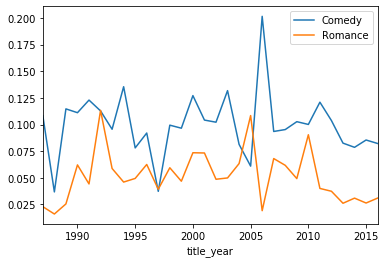

In [34]:
budget_full_ratio['Comedy'].plot()
budget_full_ratio['Romance'].plot()
plt.legend()

# Kaggle Dataset

In [35]:
movies = pd.read_csv("movies_metadata.csv")


/Users/kristeesong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [37]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [38]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [39]:
credits = pd.read_csv("credits.csv")


In [40]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [41]:
len(credits)

45476

In [42]:
credits['scarlet'] = ["Scarlett Johansson" in credits['cast'][i] for i in range(0, len(credits))]

In [43]:
credits.head()

,cast,crew,id,scarlet
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False


In [44]:
scarlet = credits.loc[credits.scarlet == True]
scarlet.shape

(51, 4)

In [45]:
scarlet.head()

,cast,crew,id,scarlet
116,"[{'cast_id': 2, 'character': 'Lucy', 'credit_i...","[{'credit_id': '52fe43599251416c7500cfc9', 'de...",10324,True
253,"[{'cast_id': 1, 'character': 'Paul Armstrong',...","[{'credit_id': '52fe44d7c3a36847f80ad35d', 'de...",9061,True
500,"[{'cast_id': 1, 'character': 'North', 'credit_...","[{'credit_id': '52fe448a9251416c910145b1', 'de...",31586,True
837,"[{'cast_id': 4, 'character': 'Elaine', 'credit...","[{'credit_id': '52fe49ed9251416c910bd5c9', 'de...",88224,True
1503,"[{'cast_id': 4, 'character': 'Robin', 'credit_...","[{'credit_id': '52fe46579251416c910514e5', 'de...",37567,True


In [46]:
scarlet_id = scarlet.id.tolist()

In [47]:
type(scarlet_id[0])
#[float(i) for i in lst]

int

In [48]:
scarlet_id = [str(i) for i in scarlet_id]
type(scarlet_id[0])

str

In [49]:
#df[df['A'].isin([3, 6])]
movies_scarlett = movies[movies['id'].isin(scarlet_id)]

In [50]:
movies_scarlett.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
116,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,10324,tt0116606,en,If Lucy Fell,Joe and Lucy are roommates and best friends. L...,...,1996-03-08,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A comedy for the romantically challenged.,If Lucy Fell,False,5.4,11.0
253,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,9061,tt0113501,en,Just Cause,Bobby Earl is facing the electric chair for th...,...,1995-02-17,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Buried deep in the Florida Everglades is a sec...,Just Cause,False,6.0,124.0
500,False,NaN,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31586,tt0110687,en,North,Eleven-year-old North has had it with his pare...,...,1994-07-22,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A family comedy that appeals to the child in e...,North,False,4.8,67.0
837,False,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,88224,tt0116985,en,Manny & Lo,A pregnant teen and her younger sister run awa...,...,1996-01-22,431326.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Manny & Lo,False,6.3,9.0
1503,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,37567,tt0119098,en,Fall,Writer/director Eric Schaeffer (If Lucy Fell) ...,...,1997-06-20,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"He's a cab driver, she's a supermodel. What t...",Fall,False,7.2,6.0


In [51]:
movies_scarlett.shape

(51, 24)

In [52]:
movies_scarlett.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [53]:
movies_scarlett.revenue

116      0.000000e+00
253      0.000000e+00
500      0.000000e+00
837      4.313260e+05
1503     0.000000e+00
1627     7.908252e+07
1645     1.868836e+08
4512     0.000000e+00
4607     8.502250e+05
4751     0.000000e+00
5344     0.000000e+00
6562     1.197239e+08
6998     3.146679e+07
7105     0.000000e+00
8247     1.401618e+08
9546     0.000000e+00
9549     1.841260e+06
10221    1.629492e+08
10576    0.000000e+00
10585    8.530637e+07
11121    3.158490e+07
11276    4.911120e+07
11354    1.096763e+08
12017    4.773810e+07
12424    0.000000e+00
12855    9.640865e+07
12921    3.903134e+07
13381    1.772594e+08
15153    6.239333e+08
17818    1.519558e+09
17943    3.867490e+05
18291    1.200818e+08
19928    2.357054e+07
21190    0.000000e+00
21698    0.000000e+00
22168    4.735125e+07
22980    5.380251e+06
23053    7.147666e+08
23358    1.265468e+08
23379    4.596794e+07
26513    0.000000e+00
26558    1.405404e+09
26567    1.153304e+09
31390    9.665506e+08
33533    6.364766e+07
41247    0

In [54]:
#removing movies with 0 revenue 
movies_scarlett = movies_scarlett.loc[movies_scarlett['revenue'] != 0]
movies_scarlett.shape

(34, 24)

In [55]:
movies_scarlett

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
837,False,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,88224,tt0116985,en,Manny & Lo,A pregnant teen and her younger sister run awa...,...,1996-01-22,4.313260e+05,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Manny & Lo,False,6.3,9.0
1627,False,"{'id': 9888, 'name': 'Home Alone Collection', ...",32000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",http://www.ha3.com/,9714,tt0119303,en,Home Alone 3,9-year-old Alex Pruitt is home alone with the ...,...,1997-12-12,7.908252e+07,102.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}, {'iso_...",Released,Ready for more. Much more.,Home Alone 3,False,5.1,632.0
1645,False,NaN,60000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,547,tt0119314,en,The Horse Whisperer,Based on the novel by the same name from Nicho...,...,1998-05-14,1.868836e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Horse Whisperer,False,6.7,296.0
4607,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,37920,tt0221799,en,An American Rhapsody,A Hungarian family forced to flee the Communis...,...,2001-06-22,8.502250e+05,106.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"One family struggles for survival, for justice...",An American Rhapsody,False,6.0,14.0
6562,False,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,153,tt0335266,en,Lost in Translation,"Two lost souls visiting Tokyo -- the young, ne...",...,2003-08-31,1.197239e+08,102.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,Everyone wants to be found.,Lost in Translation,False,7.3,1943.0
6998,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,3635,tt0335119,en,Girl with a Pearl Earring,"This film, adapted from a work of fiction by a...",...,2003-08-31,3.146679e+07,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Discover the mystery behind the legend.,Girl with a Pearl Earring,False,6.4,384.0
8247,False,"{'id': 275402, 'name': 'SpongeBob Collection',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,11836,tt0345950,en,The SpongeBob SquarePants Movie,There's trouble brewing in Bikini Bottom. Some...,...,2004-11-14,1.401618e+08,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bigger. Better. More absorbent.,The SpongeBob SquarePants Movie,False,6.7,593.0
9549,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,9953,tt0369672,en,A Love Song for Bobby Long,A headstrong young woman returns to New Orlean...,...,2004-09-02,1.841260e+06,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The heart is a lonely hunter.,A Love Song for Bobby Long,False,6.8,97.0
10221,False,NaN,126000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.theisland-themovie.com/,1635,tt0399201,en,The Island,"In 2019, Lincoln Six-Echo is a resident of a s...",...,2005-07-20,1.629492e+08,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your time will come...,The Island,False,6.5,1813.0
10585,False,NaN,15000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,116,tt0416320,en,Match Point,Match Point is Woody Allen’s satire of the Bri...,...,2005-10-26,8.530637e+07,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Passion Temptation Obsession,Match Point,False,7.2,1134.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

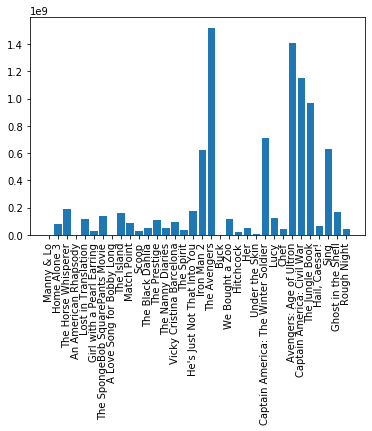

In [56]:
plt.bar(movies_scarlett.title, movies_scarlett.revenue)
plt.xticks(rotation=90)

# Next top 9 Highest Grossing Actresses and Their Movie Revenue (JT)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text xticklabel objects>)

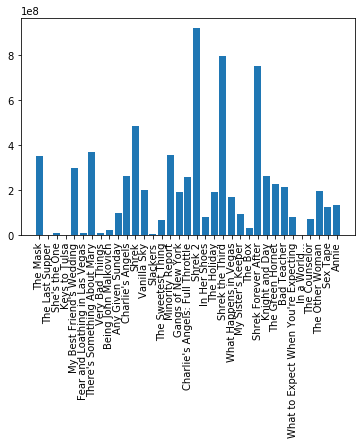

In [57]:
# Revenue Per Movie For Cameron Diaz
credits['cameron'] = ["Cameron Diaz" in credits['cast'][i] for i in range(0, len(credits))]
cameron = credits.loc[credits.cameron == True]
cameron.shape
cameron_id = cameron.id.tolist()
cameron_id = [str(i) for i in cameron_id]
movies_cameron = movies[movies['id'].isin(cameron_id)]
movies_cameron = movies_cameron.loc[movies_cameron['revenue'] != 0]
plt.bar(movies_cameron.title, movies_cameron.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text xticklabel objects>)

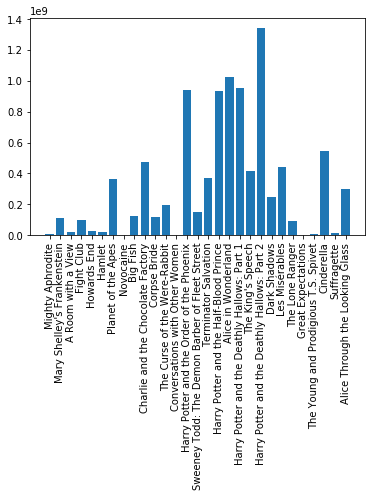

In [58]:
# Revenue Per Movie For Helena Bonham Carter
credits['helena'] = ["Helena Bonham Carter" in credits['cast'][i] for i in range(0, len(credits))]
helena = credits.loc[credits.helena == True]
helena.shape
helena_id = helena.id.tolist()
helena_id = [str(i) for i in helena_id]
movies_helena = movies[movies['id'].isin(helena_id)]
movies_helena = movies_helena.loc[movies_helena['revenue'] != 0]
plt.bar(movies_helena.title, movies_helena.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text xticklabel objects>)

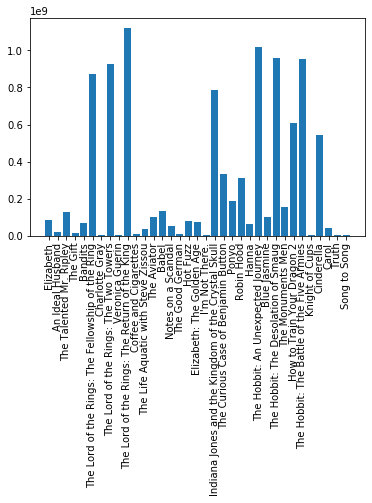

In [59]:
# Revenue Per Movie For Cate Blanchett
credits['cate'] = ["Cate Blanchett" in credits['cast'][i] for i in range(0, len(credits))]
cate = credits.loc[credits.cate == True]
cate.shape
cate_id = cate.id.tolist()
cate_id = [str(i) for i in cate_id]
movies_cate = movies[movies['id'].isin(cate_id)]
movies_cate = movies_cate.loc[movies_cate['revenue'] != 0]
plt.bar(movies_cate.title, movies_cate.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 <a list of 38 Text xticklabel objects>)

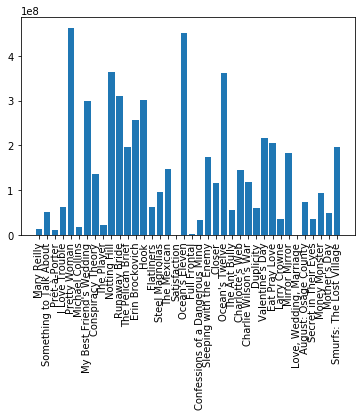

In [60]:
# Revenue Per Movie For Julia Roberts
credits['julia'] = ["Julia Roberts" in credits['cast'][i] for i in range(0, len(credits))]
julia = credits.loc[credits.julia == True]
julia.shape
julia_id = julia.id.tolist()
julia_id = [str(i) for i in julia_id]
movies_julia = movies[movies['id'].isin(julia_id)]
movies_julia = movies_julia.loc[movies_julia['revenue'] != 0]
plt.bar(movies_julia.title, movies_julia.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

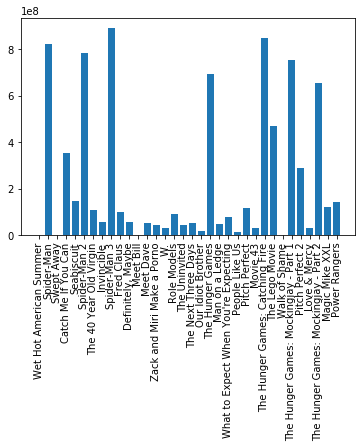

In [61]:
# Revenue Per Movie For Elizabeth Banks
credits['elizabeth'] = ["Elizabeth Banks" in credits['cast'][i] for i in range(0, len(credits))]
elizabeth = credits.loc[credits.elizabeth == True]
elizabeth.shape
elizabeth_id = elizabeth.id.tolist()
elizabeth_id = [str(i) for i in elizabeth_id]
movies_elizabeth = movies[movies['id'].isin(elizabeth_id)]
movies_elizabeth = movies_elizabeth.loc[movies_elizabeth['revenue'] != 0]
plt.bar(movies_elizabeth.title, movies_elizabeth.revenue)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

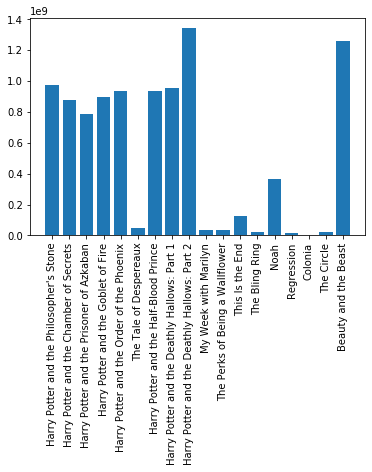

In [62]:
# Revenue Per Movie For Emma Watson
credits['emma'] = ["Emma Watson" in credits['cast'][i] for i in range(0, len(credits))]
emma = credits.loc[credits.emma == True]
emma.shape
emma_id = emma.id.tolist()
emma_id = [str(i) for i in emma_id]
movies_emma = movies[movies['id'].isin(emma_id)]
movies_emma = movies_emma.loc[movies_emma['revenue'] != 0]
plt.bar(movies_emma.title, movies_emma.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text xticklabel objects>)

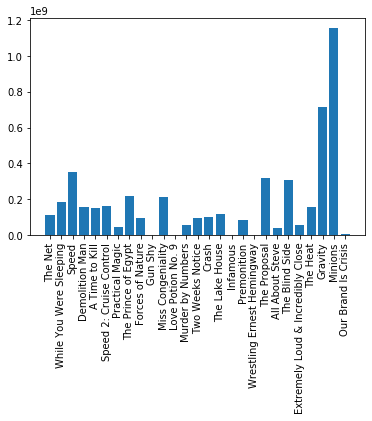

In [63]:
# Revenue Per Movie For Sanda Bullock
credits['sandra'] = ["Sandra Bullock" in credits['cast'][i] for i in range(0, len(credits))]
sandra = credits.loc[credits.sandra == True]
sandra.shape
sandra_id = sandra.id.tolist()
sandra_id = [str(i) for i in sandra_id]
movies_sandra = movies[movies['id'].isin(sandra_id)]
movies_sandra = movies_sandra.loc[movies_sandra['revenue'] != 0]
plt.bar(movies_sandra.title, movies_sandra.revenue)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

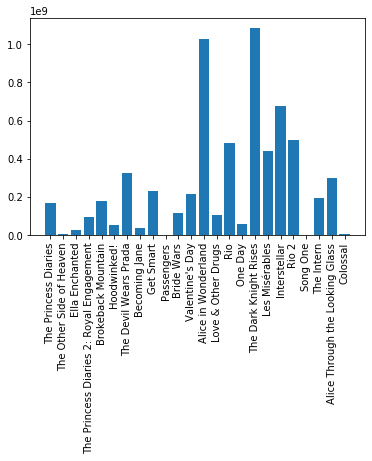

In [64]:
# Revenue Per Movie For Anne Hathaway
credits['anne'] = ["Anne Hathaway" in credits['cast'][i] for i in range(0, len(credits))]
anne = credits.loc[credits.anne == True]
anne.shape
anne_id = anne.id.tolist()
anne_id = [str(i) for i in anne_id]
movies_anne = movies[movies['id'].isin(anne_id)]
movies_anne = movies_anne.loc[movies_anne['revenue'] != 0]
plt.bar(movies_anne.title, movies_anne.revenue)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

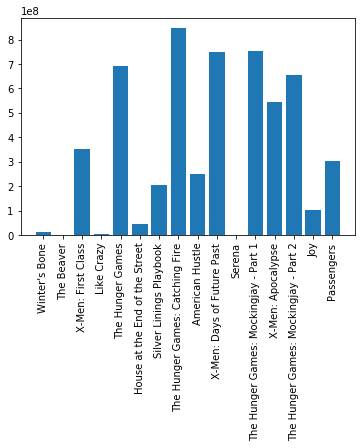

In [65]:
# Revenue Per Movie For Jennifer Lawrence
credits['jennifer'] = ["Jennifer Lawrence" in credits['cast'][i] for i in range(0, len(credits))]
jennifer = credits.loc[credits.jennifer == True]
jennifer.shape
jennifer_id = jennifer.id.tolist()
jennifer_id = [str(i) for i in jennifer_id]
movies_jennifer = movies[movies['id'].isin(jennifer_id)]
movies_jennifer = movies_jennifer.loc[movies_jennifer['revenue'] != 0]
plt.bar(movies_jennifer.title, movies_jennifer.revenue)
plt.xticks(rotation=90)

# Tagline Text mining (Kristee)

In [72]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [104]:
series = movies.loc[movies.belongs_to_collection.notnull()]
list(int(series.budget))

TypeError: cannot convert the series to <class 'int'>

In [74]:
#series['toystory'] = ["Toy Story Collection" in series['belongs_to_collection'][i] for i in range(0, len(series))]

sample = list(series.tagline)
#jennifer = credits.loc[credits.jennifer == True]

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

In [76]:
sample = [x for x in sample if str(x) != 'nan']

In [77]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

NameError: name 'X' is not defined

In [78]:
from yellowbrick.text import FreqDistVisualizer

In [79]:
vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(sample)
features = vec.get_feature_names()

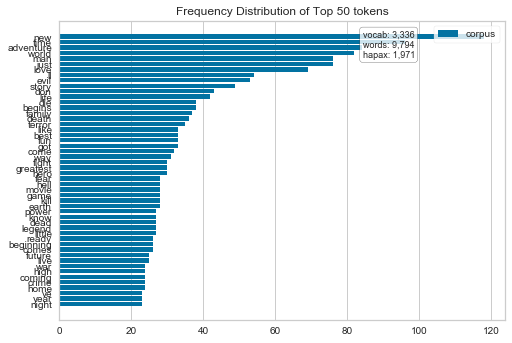

In [82]:
visualizer = FreqDistVisualizer(features=features, legend_loc = "lower right")
visualizer.fit(X)
visualizer.poof()

In [88]:
ratings = pd.read_csv("ratings.csv")
pd.merge(series, ratings, on = 'movieId')

KeyError: 'movieId'

In [84]:
ratings.loc[ratings.userId == 1]

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
